In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\DecisionTree\Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
data = data.drop(['Id'], axis=1)

In [11]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


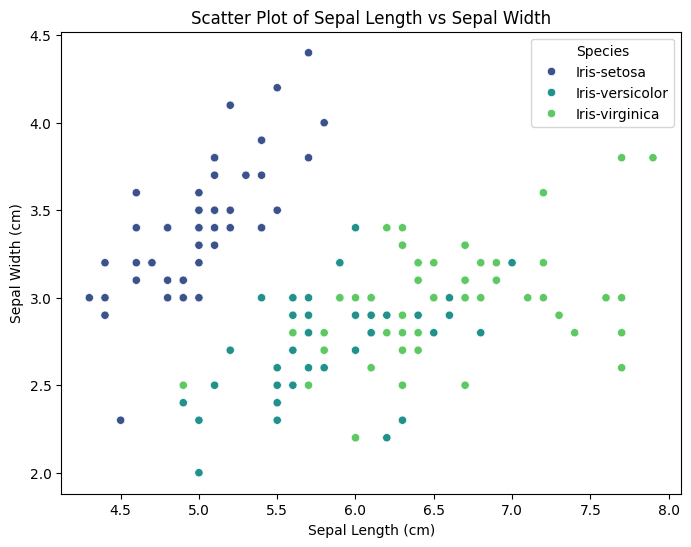

In [12]:
# Scatter plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="SepalLengthCm", y="SepalWidthCm", hue="Species", palette="viridis")
plt.title("Scatter Plot of Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Species")
plt.show()

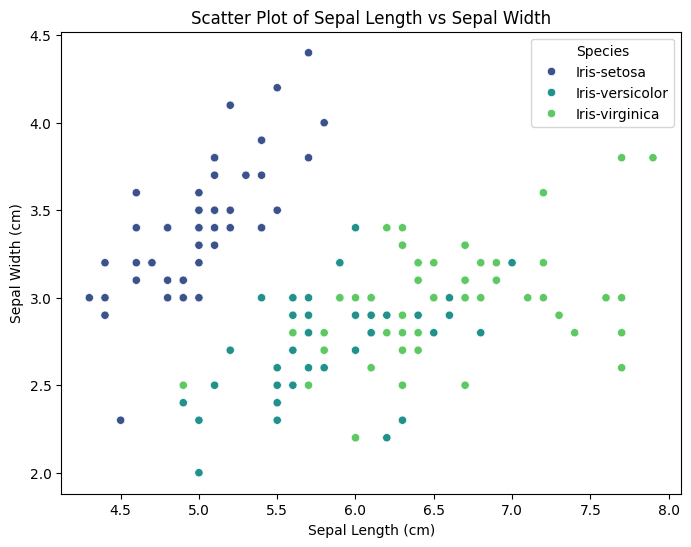

In [13]:
# Scatter plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="SepalLengthCm", y="SepalWidthCm", hue="Species", palette="viridis")
plt.title("Scatter Plot of Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Species")
plt.show()


In [14]:

# Define feature names and class names
feature_names = data.columns[:-1]  # All columns except 'Species'
class_names = data['Species'].unique().astype(str)  # Unique species names

In [15]:
X = data.drop(["Species"], axis=1)
y = data["Species"]

In [16]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Species' column into numerical values
label_encoder = LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])

In [22]:
# Define features (X) and target (y)
X = data.drop(['Species'], axis=1)
y = data['Species']

In [23]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [26]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Check the scaled data
print(X_train_scaled)  # Print the first 5 rows of scaled training data

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
y_train_scaled = scaler.fit_transform(y_train)

# Transform the test data using the same scaler
y_test_scaled = scaler.transform(y_test)

# Check the scaled data
print(y_train_scaled)  # Print the first 5 rows of scaled training data

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the training and testing sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check the scaled data
print(X_train)  # Print the first 5 rows of the scaled training data

[[0.08823529 0.66666667 0.         0.04166667]
 [0.41176471 1.         0.0877193  0.125     ]
 [0.70588235 0.45833333 0.59649123 0.54166667]
 [0.14705882 0.58333333 0.10526316 0.04166667]
 [0.02941176 0.5        0.05263158 0.04166667]
 [0.58823529 0.20833333 0.70175439 0.75      ]
 [0.61764706 0.5        0.61403509 0.58333333]
 [0.26470588 0.625      0.0877193  0.04166667]
 [0.20588235 0.66666667 0.07017544 0.04166667]
 [0.26470588 0.875      0.0877193  0.        ]
 [0.44117647 0.29166667 0.71929825 0.75      ]
 [0.5        0.58333333 0.61403509 0.625     ]
 [0.70588235 0.45833333 0.64912281 0.58333333]
 [0.32352941 0.79166667 0.05263158 0.125     ]
 [0.32352941 0.70833333 0.0877193  0.04166667]
 [0.35294118 0.16666667 0.47368421 0.375     ]
 [0.58823529 0.33333333 0.71929825 0.58333333]
 [0.61764706 0.45833333 0.78947368 0.70833333]
 [0.67647059 0.41666667 0.59649123 0.54166667]
 [0.85294118 0.66666667 0.89473684 1.        ]
 [0.41176471 0.375      0.56140351 0.5       ]
 [0.97058824 

In [ ]:
X_train

array([[0.08823529, 0.66666667, 0.        , 0.04166667],
       [0.41176471, 1.        , 0.0877193 , 0.125     ],
       [0.70588235, 0.45833333, 0.59649123, 0.54166667],
       [0.14705882, 0.58333333, 0.10526316, 0.04166667],
       [0.02941176, 0.5       , 0.05263158, 0.04166667],
       [0.58823529, 0.20833333, 0.70175439, 0.75      ],
       [0.61764706, 0.5       , 0.61403509, 0.58333333],
       [0.26470588, 0.625     , 0.0877193 , 0.04166667],
       [0.20588235, 0.66666667, 0.07017544, 0.04166667],
       [0.26470588, 0.875     , 0.0877193 , 0.        ],
       [0.44117647, 0.29166667, 0.71929825, 0.75      ],
       [0.5       , 0.58333333, 0.61403509, 0.625     ],
       [0.70588235, 0.45833333, 0.64912281, 0.58333333],
       [0.32352941, 0.79166667, 0.05263158, 0.125     ],
       [0.32352941, 0.70833333, 0.0877193 , 0.04166667],
       [0.35294118, 0.16666667, 0.47368421, 0.375     ],
       [0.58823529, 0.33333333, 0.71929825, 0.58333333],
       [0.61764706, 0.45833333,

In [ ]:
X_test

array([[0.52941176, 0.33333333, 0.64912281, 0.45833333],
       [0.41176471, 0.75      , 0.12280702, 0.08333333],
       [1.        , 0.25      , 1.03508772, 0.91666667],
       [0.5       , 0.375     , 0.61403509, 0.58333333],
       [0.73529412, 0.33333333, 0.66666667, 0.54166667],
       [0.32352941, 0.58333333, 0.0877193 , 0.125     ],
       [0.38235294, 0.375     , 0.45614035, 0.5       ],
       [0.76470588, 0.45833333, 0.71929825, 0.91666667],
       [0.55882353, 0.08333333, 0.61403509, 0.58333333],
       [0.44117647, 0.29166667, 0.50877193, 0.45833333],
       [0.64705882, 0.5       , 0.71929825, 0.79166667],
       [0.14705882, 0.41666667, 0.07017544, 0.        ],
       [0.35294118, 0.625     , 0.05263158, 0.04166667],
       [0.17647059, 0.45833333, 0.0877193 , 0.        ],
       [0.23529412, 0.75      , 0.0877193 , 0.08333333],
       [0.58823529, 0.54166667, 0.64912281, 0.625     ],
       [0.64705882, 0.41666667, 0.84210526, 0.875     ],
       [0.38235294, 0.20833333,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Define feature names and class names
feature_names = X.columns  # Feature names from the dataset
class_names = label_encoder.classes_  # Original class names

In [ ]:
# Define feature names and class names
feature_names = X.columns  # Feature names from the dataset
class_names = [str(cls) for cls in label_encoder.classes_]  # Convert class names to strings

In [ ]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

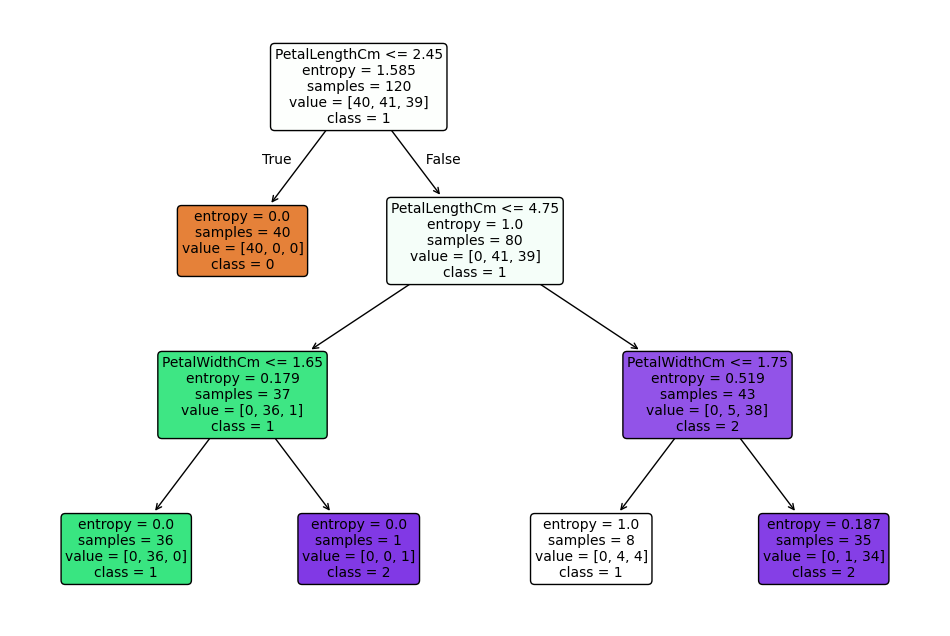

In [ ]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=10)
plt.show()

In [ ]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
data.value_counts()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
4.9            3.1           1.5            0.1           0          3
5.8            2.7           5.1            1.9           2          2
               4.0           1.2            0.2           0          1
5.9            3.0           4.2            1.5           1          1
6.2            3.4           5.4            2.3           2          1
                                                                    ..
5.5            2.3           4.0            1.3           1          1
               2.4           3.7            1.0           1          1
                             3.8            1.1           1          1
               2.5           4.0            1.3           1          1
7.9            3.8           6.4            2.0           2          1
Name: count, Length: 147, dtype: int64

In [ ]:
# Generate a confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))




Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'], 
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 4], 
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4, random_state=42)

In [ ]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [ ]:
model=DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Optimized Model Accuracy:", accuracy)

Optimized Model Accuracy: 1.0


In [ ]:
round(accuracy, 2)
# Plot the optimized decision tree

1.0

In [ ]:
round(1.0 *100)

100